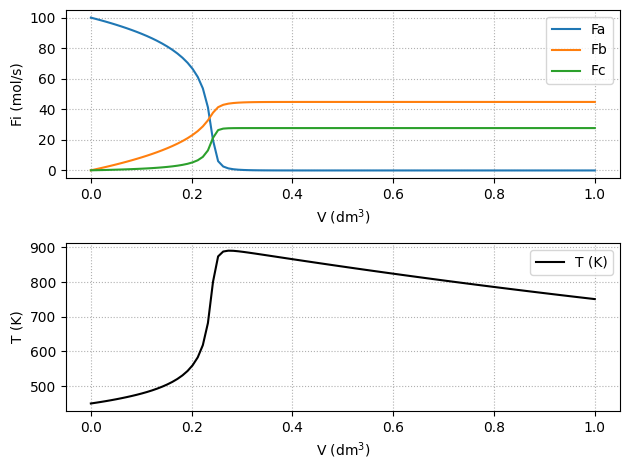

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy.integrate import solve_ivp

# A -> B, 2A -> C
# devide everything with stoichiometric coeffient of A (i.e., -1, and -2) since the reaction rates are given per molA
#                  A,     B,      C
alfa = np.array([ [1,    -1,      0],      # R1
                  [1,     0,   -1/2]])     # R2

def odes(x, y, *args):

    F = y[:-1]
    T = y[-1]
    mol_frac = F/sum(F)
    C = Cto*(mol_frac)*(To/T)

    # rate laws or reaction rate equations
    r1a = -10*np.exp((33256/8.314)*(1/300-1/T))*C[0]
    r2a = -0.09*np.exp((74826/8.314)*(1/300-1/T))*C[0]**2

    # reaction rates Ri
    Ri = np.array([r1a, r2a])

    # rates of species
    ri = np.dot(Ri, alfa)

    # MASS BALANCE
    dF = ri

    # ENERGY BALANCE
    Qg = np.dot(Ri, dH_rj)
    Qr = Ua*(T - Ta)
    dT = (Qg - Qr) / np.dot(F, Cp_i)

    return np.hstack((dF, dT))

# define constant values
Cto = 0.1 # mol/dm3
To = 373 # K
Ta = 373 # K
Ua = 4000 # J/m3/sec/K

# J/mol A that reacted in reaction 1,2
dH_rj = np.array([-20000, -60000])

# specific heat for the three species
Cp_i = np.array([90, 90, 180])

# initial conditions for the the dependent variables (4)
x0 = np.array([100, 0.1, 0.1, 450])

# descritize the volume
V = 1

args = (Ua, Ta)
# solution of the ode
sol = solve_ivp(odes, (0, V), x0, t_eval = np.linspace(0, V, 100), args = args)

fig, ax = plt.subplots(nrows = 2, dpi = 100)

for yi in sol.y[:-1]:
    ax[0].plot(sol.t, yi)

ax[0].legend(['Fa', 'Fb', 'Fc'])
ax[0].set_ylabel("Fi (mol/s)")
ax[0].set_xlabel("V (dm$^3$)")
ax[0].grid(linestyle='dotted')

ax[1].plot(sol.t, sol.y[3,:], "k-", label= "T (K)")
ax[1].set_ylabel("T (K)")
ax[1].set_xlabel("V (dm$^3$)")
ax[1].legend(facecolor='white')
ax[1].grid(linestyle='dotted')

fig.tight_layout()